In [1]:
# Add the package to the environment
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl`
Precompiling project...
   2479.7 ms  ✓ YieldFactorModels
  1 dependency successfully precompiled in 5 seconds. 418 already precompiled.


In [2]:
# Import the package and required dependencies
using Revise
using YieldFactorModels
using LinearAlgebra
using ForwardDiff
using Random

Random.seed!(123)  # For reproducibility


# NOTE: `export VAR=...` is a shell command and is not valid Julia syntax in a code cell.
# For runtime settings that can be changed from within Julia use `ENV` or library APIs.
# Set BLAS / native libraries thread knobs where possible:
ENV["OPENBLAS_NUM_THREADS"] = "1"
ENV["OMP_NUM_THREADS"] = "1"
ENV["MKL_NUM_THREADS"] = "1"  # If MKL.jl is used, prefer MKL.set_num_threads(1)
# Also set BLAS threads from Julia (affects LinearAlgebra.BLAS):
LinearAlgebra.BLAS.set_num_threads(1)


cd("..")

In [40]:
# set pwd one level back 

YieldFactorModels.run("6", 231, 12, true, "1C", Float64; window_type = "expanding",  max_group_iters=10, run_optimization=false, reestimate=false )
# vcat(fill("1", 22), fill("2", 12) )

Default param groups assigned.
Print io params: 
YieldFactorModels.jl/results/thread_id__6/1C/1C__thread_id__6__out_params.csv
In-sample loss: -3.78799155986381e7
Print io params: 
YieldFactorModels.jl/results/thread_id__6/1C/1C__thread_id__6__out_params.csv
Out-of-sample loss array (first 10%): -0.6829674360182681
Out-of-sample loss array (first 25%): -0.6711360427710394
Out-of-sample loss array (first 50%): -0.5969788311734666
Out-of-sample loss array (first 75%): -0.471445731613136
Out-of-sample loss array (full): -0.4473491968512256
Forecasting...
Forecast database not found at YieldFactorModels.jl/results/thread_id__6/1C/db/forecasts_expanding_merged.sqlite3; returning default parameters.

┌ Warning: Static parameters for 1C not found, using default initialization.
└ @ YieldFactorModels ~/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/src/YieldFactorModels.jl:118



Thread 6 estimation summary: no re-estimation performed for 1C for task 393.
Forecast database not found at YieldFactorModels.jl/results/thread_id__6/1C/db/forecasts_expanding_merged.sqlite3; returning default parameters.
Thread 6 estimation summary: no re-estimation performed for 1C for task 277.
Forecast database not found at YieldFactorModels.jl/results/thread_id__6/1C/db/forecasts_expanding_merged.sqlite3; returning default parameters.
Thread 6 estimation summary: no re-estimation performed for 1C for task 270.
Forecast database not found at YieldFactorModels.jl/results/thread_id__6/1C/db/forecasts_expanding_merged.sqlite3; returning default parameters.
Thread 6 estimation summary: no re-estimation performed for 1C for task 329.
Forecast database not found at YieldFactorModels.jl/results/thread_id__6/1C/db/forecasts_expanding_merged.sqlite3; returning default parameters.
Thread 6 estimation summary: no re-estimation performed for 1C for task 467.
Forecast database not found at Yie

YieldFactorModels.DNSModel{Float64, Float64}(YieldFactorModels.KalmanBaseModel{Float64, Float64}([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  30.0, 36.0, 48.0, 60.0, 72.0, 84.0, 96.0, 108.0, 120.0, 180.0], 24, 3, 1, [1.0 0.9553388299650875 0.04331120480777961; 1.0 0.9133171171393534 0.08152272808927452; … ; 1.0 0.0904946635326814 0.09047877955793969; 1.0 0.06033073016106509 0.06033066685595306], [1.6994661294106264, 0.08156520216018842, 0.28912876362710516], [0.95 0.0 0.0; 0.0 0.95 0.0; 0.0 0.0 0.95], [0.0, 0.0, 0.0], [-2.5], [1.0e-6 1.0e-6 1.0e-6; 1.0e-6 2.0e-6 2.0e-6; 1.0e-6 2.0e-6 3.0e-6], [0.0001 0.0 … 0.0 0.0; 0.0 0.0001 … 0.0 0.0; … ; 0.0 0.0 … 0.0001 0.0; 0.0 0.0 … 0.0 0.0001], [8.007185082148637e-6 7.430408167432968e-6 7.200499592439144e-6; 7.430408167432968e-6 1.594706386073019e-5 1.5697574878943784e-5; 7.200499592439144e-6 1.5697574878943784e-5 2.5388241208267784e-5], [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [1.8841168940057689, 1.8921385160909674, 1.898973627953814

In [17]:
using CairoMakie
using DelimitedFiles

(480, 24)
(480, 5)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


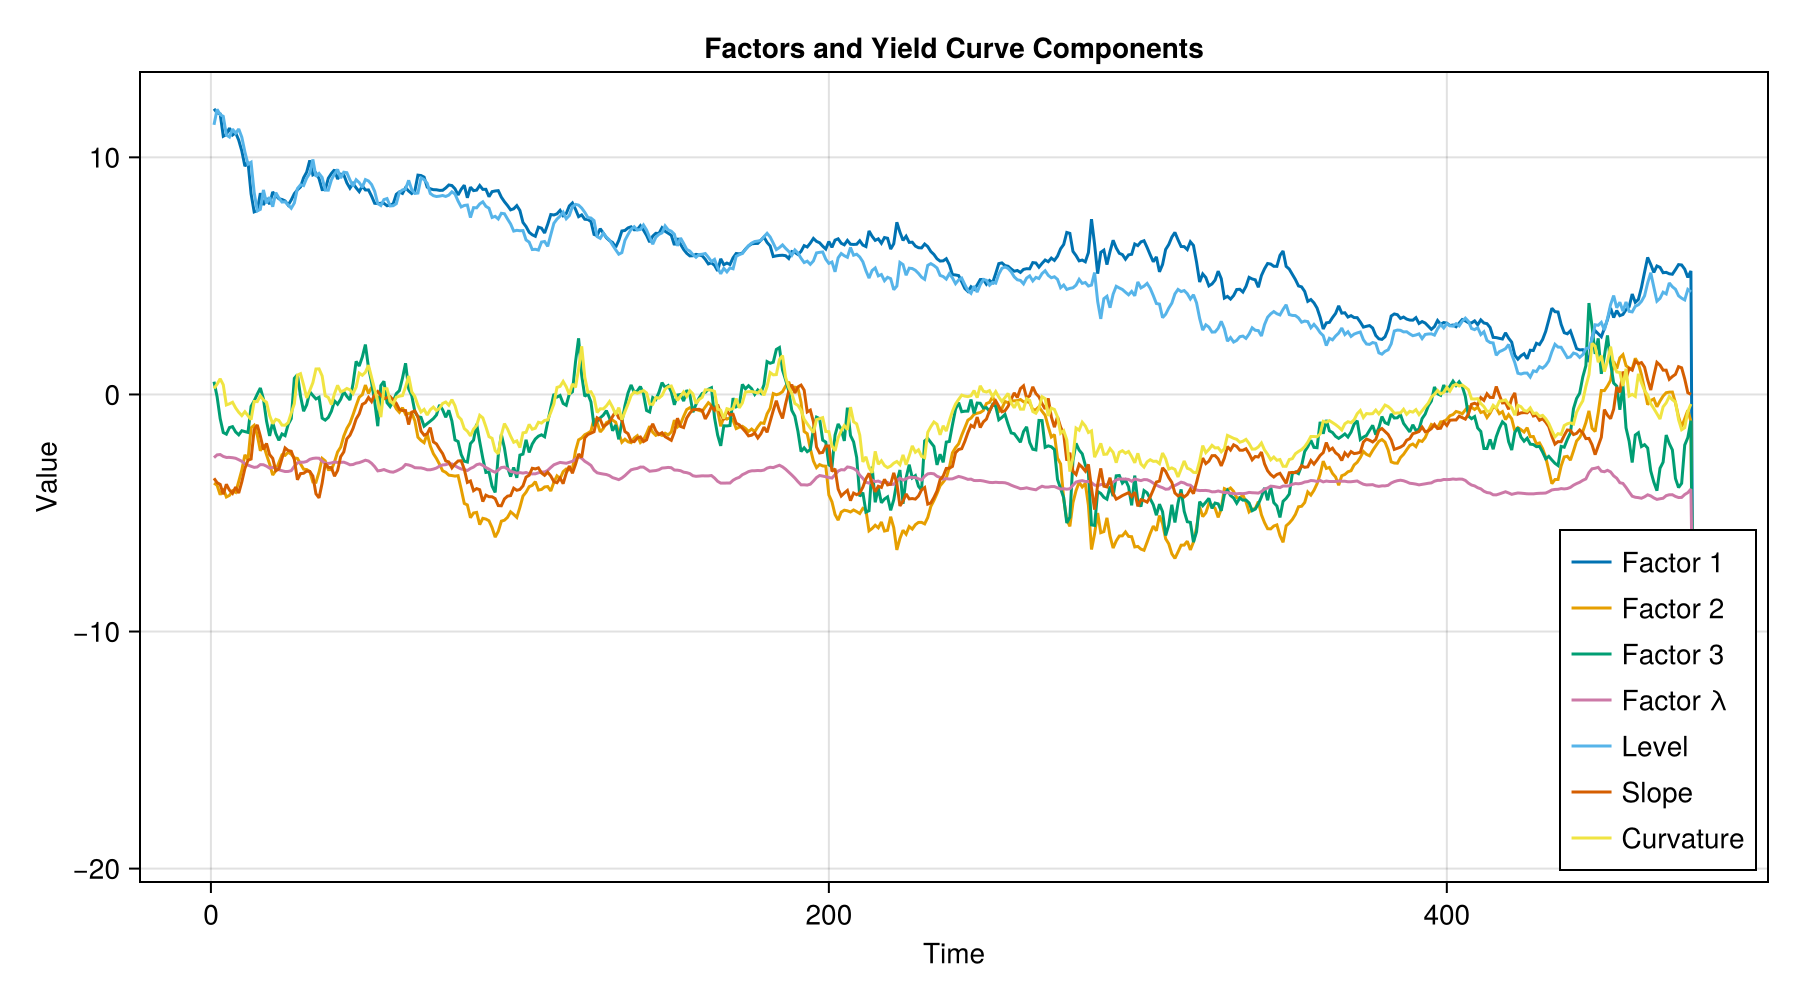

In [36]:
model_name = "TVλ" 
# read /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/results/SD-NS/SD-NS__thread_id__6__factors_filtered_outofsample.csv
filtered_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__factors_filtered_outofsample.csv", ',')
# /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv
data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv", ',')
data = data'
# print shape
println(size(data))
println(size(filtered_data))

# plot first 3 factors over time using CairoMakie

f = Figure(resolution = (900, 500))
ax = Axis(f[1, 1], xlabel = "Time", ylabel = "Value", title = "Factors and Yield Curve Components")
lines!(ax, filtered_data[:, 1], label = "Factor 1")
lines!(ax, filtered_data[:, 2], label = "Factor 2")
lines!(ax, filtered_data[:, 3], label = "Factor 3")
lines!(ax, filtered_data[:, 4], label = "Factor λ")

# plot level, slope and curvature from data
# level is last column
lines!(ax, data[1:end-1, end], label = "Level")
# slope is difference between first and last column
lines!(ax, data[1:end-1, 1] .- data[1:end-1, end], label = "Slope")
# curvature: 2 x 14th column - (1st + last)
lines!(ax, 2 .* data[1:end-1, 14] .- (data[1:end-1, 1] .+ data[1:end-1, end]), label = "Curvature")

axislegend(ax, position = :rb)
f

(480, 24)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


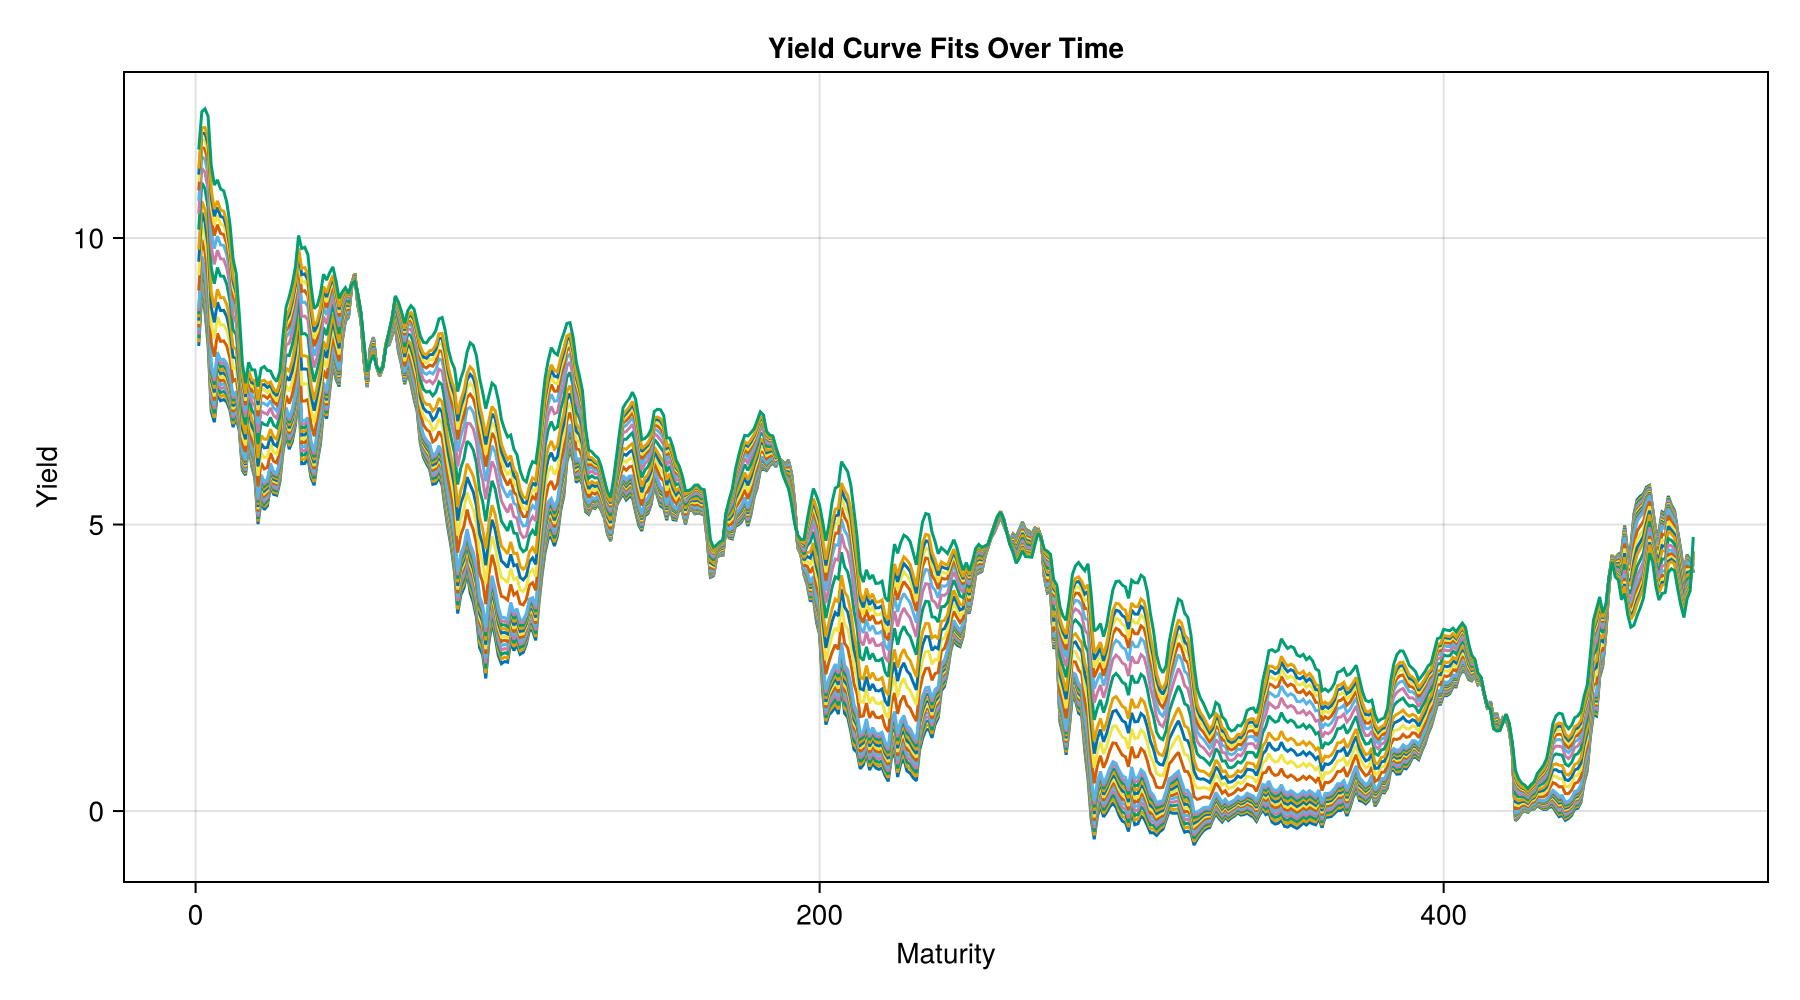

In [19]:
# plot predictions /Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/NS/NS__thread_id__6__fit_filtered_outofsample.csv
fit_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__fit_filtered_outofsample.csv", ',')

# size is (480, 24)
println(size(fit_data))

# plot all 24 lines in one plot 
f2 = Figure(resolution = (900, 500))
ax2 = Axis(f2[1, 1], xlabel = "Maturity", ylabel = "Yield", title = "Yield Curve Fits Over Time")
for i in 1:size(fit_data, 2)
    lines!(ax2, 1:size(fit_data, 1), fit_data[:, i])
end
f2
